Install Library

In [8]:
!pip install h2o

Import Libraries & Initialize the library

In [9]:
 import h2o

In [10]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,42 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_zvyocy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [11]:
from h2o.automl import H2OAutoML

In [12]:
data = h2o.import_file('column_2C_weka.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


Load data

In [13]:
data.head()

pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
63.0278,22.5526,39.6091,40.4752,98.6729,-0.2544,Abnormal
39.057,10.061,25.0154,28.996,114.405,4.56426,Abnormal
68.832,22.2185,50.0922,46.6135,105.985,-3.53032,Abnormal
69.297,24.6529,44.3112,44.6441,101.868,11.2115,Abnormal
49.7129,9.65207,28.3174,40.0608,108.169,7.9185,Abnormal
40.2502,13.9219,25.1249,26.3283,130.328,2.23065,Abnormal
53.4329,15.8643,37.1659,37.5686,120.568,5.98855,Abnormal
45.3668,10.7556,29.0383,34.6111,117.27,-10.6759,Abnormal
43.7902,13.5338,42.6908,30.2564,125.003,13.289,Abnormal
36.6864,5.01088,41.9488,31.6755,84.2414,0.664437,Abnormal


In [14]:
data.types

{'class': 'enum',
 'degree_spondylolisthesis': 'real',
 'lumbar_lordosis_angle': 'real',
 'pelvic_incidence': 'real',
 'pelvic_radius': 'real',
 'pelvic_tilt numeric': 'real',
 'sacral_slope': 'real'}

In [15]:
data.describe() 

Rows:310
Cols:7




,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
type,real,real,real,real,real,real,enum
mins,26.14792141,-6.554948347,14.0,13.3669307,70.08257486,-11.05817866,
mean,60.496652929516145,17.54282196797096,51.93092960345161,42.95383096141935,117.92065502380645,26.296694437867743,
maxs,129.8340406,49.4318636,125.7423855,121.4295656,163.0710405,418.5430821,
sigma,17.236520321708866,10.008330258206355,18.55406396276117,13.423102164839573,13.31737704490458,37.55902655487235,
zeros,0,0,0,0,0,0,
missing,0,0,0,0,0,0,0
0,63.0278175,22.55258597,39.60911701,40.47523153,98.67291675,-0.254399986,Abnormal
1,39.05695098,10.06099147,25.01537822,28.99595951,114.4054254,4.564258645,Abnormal
2,68.83202098,22.21848205,50.09219357,46.61353893,105.9851355,-3.530317314,Abnormal


Train,Test and Validation Split:-

Train:- 70%

Test:- 15%

Validation :- 15%

In [16]:
data_train,data_test,data_valid = data.split_frame(ratios=[.7, .15])

In [17]:
data_train #check train data

pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
69.297,24.6529,44.3112,44.6441,101.868,11.2115,Abnormal
49.7129,9.65207,28.3174,40.0608,108.169,7.9185,Abnormal
53.4329,15.8643,37.1659,37.5686,120.568,5.98855,Abnormal
43.7902,13.5338,42.6908,30.2564,125.003,13.289,Abnormal
36.6864,5.01088,41.9488,31.6755,84.2414,0.664437,Abnormal
49.7066,13.041,31.3345,36.6656,108.648,-7.82599,Abnormal
31.2324,17.7158,15.5,13.5166,120.055,0.499751,Abnormal
48.9156,19.9646,40.2638,28.951,119.321,8.02889,Abnormal
53.5722,20.4608,33.1,33.1113,110.967,7.0448,Abnormal
57.3002,24.1889,47,33.1113,116.807,5.76695,Abnormal


In [18]:
data_test  #check test data

pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
40.2502,13.9219,25.1249,26.3283,130.328,2.23065,Abnormal
31.276,3.14467,32.563,28.1313,129.011,3.62302,Abnormal
45.5408,13.0696,30.2983,32.4712,117.981,-4.98713,Abnormal
26.1479,10.7595,14,15.3885,125.203,-10.0931,Abnormal
44.551,21.9311,26.7859,22.6199,111.073,2.65232,Abnormal
50.8193,15.4022,42.5289,35.4171,112.193,10.8696,Abnormal
44.5291,9.43323,52,35.0958,134.712,29.1066,Abnormal
76.1472,21.9362,82.9615,54.211,123.932,10.432,Abnormal
78.4917,22.1818,60,56.3099,118.53,27.3832,Abnormal
58.7825,7.66704,53.3389,51.1155,98.5012,51.5841,Abnormal


In [19]:
data_valid    #check validation data

pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
63.0278,22.5526,39.6091,40.4752,98.6729,-0.2544,Abnormal
39.057,10.061,25.0154,28.996,114.405,4.56426,Abnormal
68.832,22.2185,50.0922,46.6135,105.985,-3.53032,Abnormal
45.3668,10.7556,29.0383,34.6111,117.27,-10.6759,Abnormal
63.835,20.3625,54.5524,43.4725,112.309,-0.622527,Abnormal
38.6979,13.4447,31,25.2532,123.159,1.42919,Abnormal
50.9124,23.0152,47,27.8973,117.422,-2.5267,Abnormal
41.3525,16.5774,30.7062,24.7751,113.267,-4.49796,Abnormal
41.7677,17.8994,20.0309,23.8683,118.363,2.06296,Abnormal
89.6806,32.7044,83.1307,56.9761,129.955,92.0273,Abnormal


Predictors and outcome split

In [20]:
y = "class"
x = data.columns
x.remove(y)

Create model object:-

maximum model= 10

nfold=0 means no cross validation (default=5)

exclude_algorithms = stacking and dL both allowed

for entire seen output use verbosity ='debug'

In [21]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


In [22]:
!nvidia-smi                  #Check GPU

Mon Aug  3 11:33:29 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Train the model

In [23]:
aml.train(x = x, y = y, training_frame = data_train, validation_frame=data_valid)

AutoML progress: |
11:33:30.782: Project: AutoML_20200803_113330769
11:33:30.783: Cross-validation disabled by user: no fold column nor nfolds > 1.
11:33:30.783: Setting stopping tolerance adaptively based on the training frame: 0.05
11:33:30.783: Build control seed: 10
11:33:30.783: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
11:33:30.811: training frame: Frame key: automl_training_py_3_sid_b758    cols: 7    rows: 195  chunks: 1    size: 10435  checksum: 8633014583615197319
11:33:30.811: validation frame: Frame key: py_5_sid_b758    cols: 7    rows: 48  chunks: 1    size: 3360  checksum: -2095275836799045784
11:33:30.821: leaderboard frame: Frame key: automl_leaderboard_py_3_sid_b758    cols: 7    rows: 25  chunks: 1    size: 2254  checksum: -999309019715466133
11:33:30.821: blending frame: NULL
11:33:30.821: response column: class
11:33:30.821: fold column: nu

In [24]:
!nvidia-smi

Mon Aug  3 11:33:43 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    31W / 250W |    289MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
leaderboard = aml.leaderboard

In [26]:
leaderboard.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_20200803_113330,0.982456,0.218948,0.943921,0.0263158,0.253901,0.0644659
XGBoost_1_AutoML_20200803_113330,0.929825,0.279978,0.853809,0.166667,0.293545,0.086169
DRF_1_AutoML_20200803_113330,0.916667,0.281877,0.840127,0.166667,0.298061,0.0888401
GBM_4_AutoML_20200803_113330,0.912281,0.277916,0.849806,0.166667,0.277077,0.0767717
GBM_2_AutoML_20200803_113330,0.903509,0.284781,0.862049,0.109649,0.276797,0.0766167
XRT_1_AutoML_20200803_113330,0.899123,0.273524,0.821906,0.166667,0.288506,0.083236
XGBoost_3_AutoML_20200803_113330,0.894737,0.314902,0.858468,0.109649,0.302038,0.0912268
GBM_3_AutoML_20200803_113330,0.894737,0.291431,0.858468,0.109649,0.282783,0.079966
GBM_1_AutoML_20200803_113330,0.815789,0.378053,0.773867,0.166667,0.305443,0.0932953
XGBoost_2_AutoML_20200803_113330,0.767544,0.453733,0.676729,0.25,0.37808,0.142945


From above leaderboard we found that GBM is working fine
​

# Prediction on test data

In [28]:
data_pred=aml.leader.predict(data_test)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [29]:
data_pred.head()
## Probabilty of abnormal and normal for head(10) records

predict,Abnormal,Normal
Normal,0.398892,0.601108
Normal,0.249578,0.750422
Normal,0.351572,0.648428
Normal,0.370321,0.629679
Abnormal,0.927852,0.0721481
Abnormal,0.846215,0.153785
Abnormal,0.741852,0.258148
Normal,0.280338,0.719662
Abnormal,0.823545,0.176455
Abnormal,0.997221,0.00277924


Check performance metrics

In [30]:
aml.leader.model_performance(data_test)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.11700434663263988
RMSE: 0.34205898121908723
LogLoss: 0.34216813595200724
Null degrees of freedom: 41
Residual degrees of freedom: 35
Null deviance: 53.47218648601943
Residual deviance: 28.742123419968607
AIC: 42.74212341996861
AUC: 0.9209183673469388
AUCPR: 0.8696220833960274
Gini: 0.8418367346938775

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20174306408810003: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,20.0,8.0,0.2857,(8.0/28.0)
1,Normal,0.0,14.0,0.0,(0.0/14.0)
2,Total,20.0,22.0,0.1905,(8.0/42.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,2.017431e-01,0.777778,21.0
1,max f2,2.017431e-01,0.897436,21.0
2,max f0point5,7.526890e-01,0.833333,6.0
3,max accuracy,7.352861e-01,0.857143,9.0
4,max precision,9.083492e-01,1.000000,0.0
5,max recall,2.017431e-01,1.000000,21.0
6,max specificity,9.083492e-01,1.000000,0.0
7,max absolute_mcc,2.017431e-01,0.674200,21.0
8,max min_per_class_accuracy,5.658058e-01,0.785714,15.0
9,max mean_per_class_accuracy,2.017431e-01,0.857143,21.0



Gains/Lift Table: Avg response rate: 33.33 %, avg score: 35.07 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.023810,9.070114e-01,3.00,3.000000,1.00,0.908349,1.000000,0.908349,0.071429,0.071429,200.0,200.000000,0.071429
1,2,0.023810,9.056737e-01,0.00,3.000000,0.00,0.000000,1.000000,0.908349,0.000000,0.071429,-100.0,200.000000,0.071429
2,3,0.047619,9.032586e-01,3.00,3.000000,1.00,0.905086,1.000000,0.906718,0.071429,0.142857,200.0,200.000000,0.142857
3,4,0.047619,9.000004e-01,0.00,3.000000,0.00,0.000000,1.000000,0.906718,0.000000,0.142857,-100.0,200.000000,0.142857
4,5,0.071429,8.970794e-01,3.00,3.000000,1.00,0.897140,1.000000,0.903525,0.071429,0.214286,200.0,200.000000,0.214286
5,6,0.119048,8.311075e-01,3.00,3.000000,1.00,0.866620,1.000000,0.888763,0.142857,0.357143,200.0,200.000000,0.357143
6,7,0.166667,7.523489e-01,3.00,3.000000,1.00,0.764016,1.000000,0.853121,0.142857,0.500000,200.0,200.000000,0.500000
7,8,0.214286,7.417475e-01,1.50,2.666667,0.50,0.746893,0.888889,0.829515,0.071429,0.571429,50.0,166.666667,0.535714
8,9,0.309524,6.428037e-01,1.50,2.307692,0.50,0.688239,0.769231,0.786045,0.142857,0.714286,50.0,130.769231,0.607143
9,10,0.404762,4.879410e-01,0.75,1.941176,0.25,0.578209,0.647059,0.737142,0.071429,0.785714,-25.0,94.117647,0.571429


Try with all the model rather than leader model only i.e GBM

In [31]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [32]:
model_ids

['GLM_1_AutoML_20200803_113330',
 'XGBoost_1_AutoML_20200803_113330',
 'DRF_1_AutoML_20200803_113330',
 'GBM_4_AutoML_20200803_113330',
 'GBM_2_AutoML_20200803_113330',
 'XRT_1_AutoML_20200803_113330',
 'XGBoost_3_AutoML_20200803_113330',
 'GBM_3_AutoML_20200803_113330',
 'GBM_1_AutoML_20200803_113330',
 'XGBoost_2_AutoML_20200803_113330']

In [33]:
h2o.get_model([i for i in model_ids if "DRF" in i][0])

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_1_AutoML_20200803_113330


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,17054.0,6.0,14.0,8.66,12.0,33.0,22.4




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.09660564031563437
RMSE: 0.3108144789349981
LogLoss: 0.3032308237616388
Mean Per-Class Error: 0.13030772900763354
AUC: 0.9309995229007634
AUCPR: 0.8882048791286449
Gini: 0.8619990458015268

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2857142857142857: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,103.0,28.0,0.2137,(28.0/131.0)
1,Normal,3.0,61.0,0.0469,(3.0/64.0)
2,Total,106.0,89.0,0.159,(31.0/195.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.285714,0.797386,64.0
1,max f2,0.285714,0.884058,64.0
2,max f0point5,0.714286,0.840909,26.0
3,max accuracy,0.600000,0.866667,33.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.052632,1.000000,98.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.285714,0.697025,64.0
8,max min_per_class_accuracy,0.380952,0.843750,52.0
9,max mean_per_class_accuracy,0.285714,0.869692,64.0



Gains/Lift Table: Avg response rate: 32.82 %, avg score: 32.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.035897,1.000000,3.046875,3.046875,1.000000,1.000000,1.000000,1.000000,0.109375,0.109375,204.687500,204.687500,0.109375
1,2,0.046154,0.954545,3.046875,3.046875,1.000000,0.954545,1.000000,0.989899,0.031250,0.140625,204.687500,204.687500,0.140625
2,3,0.051282,0.946111,3.046875,3.046875,1.000000,0.950000,1.000000,0.985909,0.015625,0.156250,204.687500,204.687500,0.156250
3,4,0.107692,0.875000,3.046875,3.046875,1.000000,0.905364,1.000000,0.943719,0.171875,0.328125,204.687500,204.687500,0.328125
4,5,0.153846,0.784416,2.708333,2.945312,0.888889,0.818372,0.966667,0.906115,0.125000,0.453125,170.833333,194.531250,0.445491
5,6,0.200000,0.707563,2.708333,2.890625,0.888889,0.746213,0.948718,0.869215,0.125000,0.578125,170.833333,189.062500,0.562858
6,7,0.302564,0.523048,1.371094,2.375530,0.450000,0.615573,0.779661,0.783234,0.140625,0.718750,37.109375,137.552966,0.619513
7,8,0.400000,0.340000,1.443257,2.148438,0.473684,0.420178,0.705128,0.694797,0.140625,0.859375,44.325658,114.843750,0.683802
8,9,0.502564,0.187500,0.914062,1.896524,0.300000,0.270643,0.622449,0.608235,0.093750,0.953125,-8.593750,89.652423,0.670682
9,10,0.600000,0.085354,0.000000,1.588542,0.000000,0.111855,0.521368,0.527626,0.000000,0.953125,-100.000000,58.854167,0.525644




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.15935763611034506
RMSE: 0.39919623759542755
LogLoss: 0.47630402017843493
Mean Per-Class Error: 0.21875
AUC: 0.8271484375
AUCPR: 0.7276228940993353
Gini: 0.654296875

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18000000000000005: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,22.0,10.0,0.3125,(10.0/32.0)
1,Normal,2.0,14.0,0.125,(2.0/16.0)
2,Total,24.0,24.0,0.25,(12.0/48.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.180000,0.700000,16.0
1,max f2,0.060000,0.808081,22.0
2,max f0point5,0.520808,0.735294,7.0
3,max accuracy,0.520808,0.812500,7.0
4,max precision,0.940000,1.000000,0.0
5,max recall,0.060000,1.000000,22.0
6,max specificity,0.940000,1.000000,0.0
7,max absolute_mcc,0.520808,0.563545,7.0
8,max min_per_class_accuracy,0.360000,0.687500,11.0
9,max mean_per_class_accuracy,0.180000,0.781250,16.0



Gains/Lift Table: Avg response rate: 33.33 %, avg score: 28.83 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.041667,0.940000,3.000000,3.000000,1.000000,0.940000,1.000000,0.940000,0.1250,0.1250,200.000000,200.000000,0.12500
1,2,0.041667,0.931800,0.000000,3.000000,0.000000,0.000000,1.000000,0.940000,0.0000,0.1250,-100.000000,200.000000,0.12500
2,3,0.041667,0.922400,0.000000,3.000000,0.000000,0.000000,1.000000,0.940000,0.0000,0.1250,-100.000000,200.000000,0.12500
3,4,0.083333,0.920000,3.000000,3.000000,1.000000,0.920000,1.000000,0.930000,0.1250,0.2500,200.000000,200.000000,0.25000
4,5,0.104167,0.702000,0.000000,2.400000,0.000000,0.800000,0.800000,0.904000,0.0000,0.2500,-100.000000,140.000000,0.21875
5,6,0.166667,0.638000,2.000000,2.250000,0.666667,0.653333,0.750000,0.810000,0.1250,0.3750,100.000000,125.000000,0.31250
6,7,0.229167,0.600000,2.000000,2.181818,0.666667,0.600000,0.727273,0.752727,0.1250,0.5000,100.000000,118.181818,0.40625
7,8,0.312500,0.470081,1.500000,2.000000,0.500000,0.520202,0.666667,0.690721,0.1250,0.6250,50.000000,100.000000,0.46875
8,9,0.395833,0.268000,0.750000,1.736842,0.250000,0.335404,0.578947,0.615917,0.0625,0.6875,-25.000000,73.684211,0.43750
9,10,0.500000,0.170404,1.800000,1.750000,0.600000,0.216000,0.583333,0.532601,0.1875,0.8750,80.000000,75.000000,0.56250




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-08-03 11:33:35,0.009 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-08-03 11:33:35,0.166 sec,5.0,0.370790,2.901937,0.846455,0.734701,2.485609,0.174157,0.440039,3.181988,0.719727,0.624925,2.5,0.250000
2,,2020-08-03 11:33:35,0.255 sec,10.0,0.319204,0.808332,0.916865,0.865072,2.951660,0.133333,0.418689,2.490854,0.764648,0.640283,2.0,0.208333
3,,2020-08-03 11:33:35,0.329 sec,15.0,0.309491,0.481793,0.926407,0.894706,3.046875,0.112821,0.406545,1.813106,0.782227,0.697792,3.0,0.208333
4,,2020-08-03 11:33:35,0.380 sec,20.0,0.314338,0.311894,0.928077,0.877557,3.046875,0.133333,0.399240,1.137800,0.803711,0.711380,3.0,0.250000
5,,2020-08-03 11:33:35,0.429 sec,25.0,0.315497,0.303912,0.930045,0.883325,3.046875,0.138462,0.399437,0.488690,0.811523,0.717359,3.0,0.187500
6,,2020-08-03 11:33:35,0.462 sec,30.0,0.312849,0.300680,0.931715,0.889441,3.046875,0.138462,0.399418,0.484810,0.825195,0.725098,3.0,0.250000
7,,2020-08-03 11:33:35,0.498 sec,35.0,0.310392,0.296831,0.933743,0.890855,3.046875,0.133333,0.396637,0.472107,0.826172,0.719586,3.0,0.250000
8,,2020-08-03 11:33:35,0.532 sec,40.0,0.312868,0.301248,0.930582,0.887141,3.046875,0.148718,0.398616,0.481144,0.833008,0.742922,3.0,0.250000
9,,2020-08-03 11:33:35,0.566 sec,45.0,0.308583,0.296778,0.932312,0.891016,3.046875,0.158974,0.398071,0.476251,0.835938,0.742316,3.0,0.250000



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,degree_spondylolisthesis,496.823547,1.000000,0.325724
1,pelvic_radius,333.716980,0.671701,0.218789
2,pelvic_incidence,200.012848,0.402583,0.131131
3,pelvic_tilt numeric,193.560074,0.389595,0.126900
4,sacral_slope,165.636108,0.333390,0.108593
5,lumbar_lordosis_angle,135.540665,0.272814,0.088862


In [34]:
h2o.get_model([i for i in model_ids if "XGBoost" in i][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_20200803_113330


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.056019651649855715
RMSE: 0.2366847093706218
LogLoss: 0.20341633939729264
Mean Per-Class Error: 0.07359255725190839
AUC: 0.9821087786259542
AUCPR: 0.9685113178056488
Gini: 0.9642175572519085

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4336775243282318: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,124.0,7.0,0.0534,(7.0/131.0)
1,Normal,6.0,58.0,0.0938,(6.0/64.0)
2,Total,130.0,65.0,0.0667,(13.0/195.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.433678,0.899225,62.0
1,max f2,0.224652,0.923754,82.0
2,max f0point5,0.585487,0.946429,51.0
3,max accuracy,0.585487,0.938462,51.0
4,max precision,0.983513,1.000000,0.0
5,max recall,0.146220,1.000000,89.0
6,max specificity,0.983513,1.000000,0.0
7,max absolute_mcc,0.585487,0.860980,51.0
8,max min_per_class_accuracy,0.433678,0.906250,62.0
9,max mean_per_class_accuracy,0.433678,0.926407,62.0



Gains/Lift Table: Avg response rate: 32.82 %, avg score: 32.92 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010256,0.980879,3.046875,3.046875,1.000000,0.982733,1.000000,0.982733,0.031250,0.031250,204.687500,204.687500,0.031250
1,2,0.020513,0.974611,3.046875,3.046875,1.000000,0.979389,1.000000,0.981061,0.031250,0.062500,204.687500,204.687500,0.062500
2,3,0.030769,0.962518,3.046875,3.046875,1.000000,0.969121,1.000000,0.977081,0.031250,0.093750,204.687500,204.687500,0.093750
3,4,0.041026,0.954467,3.046875,3.046875,1.000000,0.959320,1.000000,0.972641,0.031250,0.125000,204.687500,204.687500,0.125000
4,5,0.051282,0.950165,3.046875,3.046875,1.000000,0.952700,1.000000,0.968653,0.031250,0.156250,204.687500,204.687500,0.156250
5,6,0.102564,0.890423,3.046875,3.046875,1.000000,0.922853,1.000000,0.945753,0.156250,0.312500,204.687500,204.687500,0.312500
6,7,0.153846,0.866835,3.046875,3.046875,1.000000,0.878920,1.000000,0.923475,0.156250,0.468750,204.687500,204.687500,0.468750
7,8,0.200000,0.766382,3.046875,3.046875,1.000000,0.818265,1.000000,0.899196,0.140625,0.609375,204.687500,204.687500,0.609375
8,9,0.302564,0.498170,2.132812,2.737023,0.700000,0.651961,0.898305,0.815387,0.218750,0.828125,113.281250,173.702331,0.782323
9,10,0.400000,0.310888,1.282895,2.382812,0.421053,0.403704,0.782051,0.715106,0.125000,0.953125,28.289474,138.281250,0.823354




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.15317286396288995
RMSE: 0.39137304961237424
LogLoss: 0.47076200591361356
Mean Per-Class Error: 0.234375
AUC: 0.841796875
AUCPR: 0.7858162311074687
Gini: 0.68359375

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07910460978746414: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,19.0,13.0,0.4062,(13.0/32.0)
1,Normal,1.0,15.0,0.0625,(1.0/16.0)
2,Total,20.0,28.0,0.2917,(14.0/48.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.079105,0.681818,27.0
1,max f2,0.043476,0.833333,30.0
2,max f0point5,0.749256,0.833333,7.0
3,max accuracy,0.749256,0.833333,7.0
4,max precision,0.958770,1.000000,0.0
5,max recall,0.043476,1.000000,30.0
6,max specificity,0.958770,1.000000,0.0
7,max absolute_mcc,0.749256,0.632456,7.0
8,max min_per_class_accuracy,0.262072,0.687500,20.0
9,max mean_per_class_accuracy,0.079105,0.765625,27.0



Gains/Lift Table: Avg response rate: 33.33 %, avg score: 29.94 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.020833,0.957440,3.00,3.000000,1.00,0.958770,1.000000,0.958770,0.0625,0.0625,200.0,200.000000,0.06250
1,2,0.020833,0.956109,0.00,3.000000,0.00,0.000000,1.000000,0.958770,0.0000,0.0625,-100.0,200.000000,0.06250
2,3,0.041667,0.940137,3.00,3.000000,1.00,0.955940,1.000000,0.957355,0.0625,0.1250,200.0,200.000000,0.12500
3,4,0.041667,0.922023,0.00,3.000000,0.00,0.000000,1.000000,0.957355,0.0000,0.1250,-100.0,200.000000,0.12500
4,5,0.062500,0.913617,3.00,3.000000,1.00,0.917398,1.000000,0.944036,0.0625,0.1875,200.0,200.000000,0.18750
5,6,0.104167,0.810366,3.00,3.000000,1.00,0.890348,1.000000,0.922561,0.1250,0.3125,200.0,200.000000,0.31250
6,7,0.166667,0.744433,3.00,3.000000,1.00,0.765870,1.000000,0.863802,0.1875,0.5000,200.0,200.000000,0.50000
7,8,0.208333,0.641072,0.00,2.400000,0.00,0.647649,0.800000,0.820571,0.0000,0.5000,-100.0,140.000000,0.43750
8,9,0.312500,0.415396,1.20,2.000000,0.40,0.501325,0.666667,0.714156,0.1250,0.6250,20.0,100.000000,0.46875
9,10,0.395833,0.283641,0.00,1.578947,0.00,0.352430,0.526316,0.638003,0.0000,0.6250,-100.0,57.894737,0.34375




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-08-03 11:33:31,0.046 sec,0.0,0.500000,0.693147,0.500000,0.328205,1.000000,0.671795,0.500000,0.693147,0.500000,0.333333,1.0,0.666667
1,,2020-08-03 11:33:31,0.417 sec,5.0,0.336767,0.387308,0.941078,0.903177,3.046875,0.117949,0.397364,0.481254,0.833008,0.712337,3.0,0.270833
2,,2020-08-03 11:33:31,0.490 sec,10.0,0.291414,0.295080,0.953483,0.911510,3.046875,0.102564,0.390226,0.447061,0.842773,0.742816,3.0,0.250000
3,,2020-08-03 11:33:31,0.533 sec,15.0,0.268338,0.258797,0.972090,0.948625,3.046875,0.076923,0.398866,0.476267,0.829102,0.754324,3.0,0.270833
4,,2020-08-03 11:33:31,0.586 sec,20.0,0.251794,0.236239,0.978411,0.961899,3.046875,0.056410,0.390492,0.469960,0.833008,0.782261,3.0,0.166667
5,,2020-08-03 11:33:31,0.644 sec,25.0,0.239603,0.214168,0.982347,0.969766,3.046875,0.056410,0.388067,0.460531,0.839844,0.794285,3.0,0.145833
6,,2020-08-03 11:33:31,0.694 sec,30.0,0.236685,0.203416,0.982109,0.968511,3.046875,0.066667,0.391373,0.470762,0.841797,0.785816,3.0,0.291667



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,degree_spondylolisthesis,106.229172,1.000000,0.417284
1,pelvic_radius,59.366337,0.558852,0.233200
2,pelvic_tiltnumeric,32.896473,0.309675,0.129222
3,lumbar_lordosis_angle,26.917589,0.253392,0.105736
4,sacral_slope,26.001648,0.244769,0.102138
5,pelvic_incidence,3.161361,0.029760,0.012418


Check Parameters use for xgboost model

In [35]:
final = h2o.get_model([i for i in model_ids if "XGBoost" in i][0])

In [36]:
final.params

{'backend': {'actual': 'auto', 'default': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False},
 'calibrate_model': {'actual': False, 'default': False},
 'calibration_frame': {'actual': None, 'default': None},
 'categorical_encoding': {'actual': 'AUTO', 'default': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0},
 'distribution': {'actual': 'bernoulli', 'default': 'AUTO'},
 'dmatrix_type': {'actual': 'auto', 'default': 'auto'},
 'eta': {'actual': 0.3, 'default': 0.3},
 'export_checkpoints_dir': {'actual': None, 'default': None},
 'fold_assignment': {'actual': 'AUTO', 'default': 'AUTO'},
 'fold_column': {'actual': None, 'default': None},
 'gainslift_bins': {'actual': -1, 'default': -1},
 

Check best parameters after converting H2O parameter into xgboost parameter


In [37]:
final.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'gpu_id': 0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_bin': 256,
  'max_delta_step': 0.0,
  'max_depth': 10,
  'min_child_weight': 5.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 10,
  'silent': True,
  'subsample': 0.6,
  'updater': 'grow_gpu_hist'},
 10000)

In [38]:
final

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_20200803_113330


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.056019651649855715
RMSE: 0.2366847093706218
LogLoss: 0.20341633939729264
Mean Per-Class Error: 0.07359255725190839
AUC: 0.9821087786259542
AUCPR: 0.9685113178056488
Gini: 0.9642175572519085

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4336775243282318: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,124.0,7.0,0.0534,(7.0/131.0)
1,Normal,6.0,58.0,0.0938,(6.0/64.0)
2,Total,130.0,65.0,0.0667,(13.0/195.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.433678,0.899225,62.0
1,max f2,0.224652,0.923754,82.0
2,max f0point5,0.585487,0.946429,51.0
3,max accuracy,0.585487,0.938462,51.0
4,max precision,0.983513,1.000000,0.0
5,max recall,0.146220,1.000000,89.0
6,max specificity,0.983513,1.000000,0.0
7,max absolute_mcc,0.585487,0.860980,51.0
8,max min_per_class_accuracy,0.433678,0.906250,62.0
9,max mean_per_class_accuracy,0.433678,0.926407,62.0



Gains/Lift Table: Avg response rate: 32.82 %, avg score: 32.92 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010256,0.980879,3.046875,3.046875,1.000000,0.982733,1.000000,0.982733,0.031250,0.031250,204.687500,204.687500,0.031250
1,2,0.020513,0.974611,3.046875,3.046875,1.000000,0.979389,1.000000,0.981061,0.031250,0.062500,204.687500,204.687500,0.062500
2,3,0.030769,0.962518,3.046875,3.046875,1.000000,0.969121,1.000000,0.977081,0.031250,0.093750,204.687500,204.687500,0.093750
3,4,0.041026,0.954467,3.046875,3.046875,1.000000,0.959320,1.000000,0.972641,0.031250,0.125000,204.687500,204.687500,0.125000
4,5,0.051282,0.950165,3.046875,3.046875,1.000000,0.952700,1.000000,0.968653,0.031250,0.156250,204.687500,204.687500,0.156250
5,6,0.102564,0.890423,3.046875,3.046875,1.000000,0.922853,1.000000,0.945753,0.156250,0.312500,204.687500,204.687500,0.312500
6,7,0.153846,0.866835,3.046875,3.046875,1.000000,0.878920,1.000000,0.923475,0.156250,0.468750,204.687500,204.687500,0.468750
7,8,0.200000,0.766382,3.046875,3.046875,1.000000,0.818265,1.000000,0.899196,0.140625,0.609375,204.687500,204.687500,0.609375
8,9,0.302564,0.498170,2.132812,2.737023,0.700000,0.651961,0.898305,0.815387,0.218750,0.828125,113.281250,173.702331,0.782323
9,10,0.400000,0.310888,1.282895,2.382812,0.421053,0.403704,0.782051,0.715106,0.125000,0.953125,28.289474,138.281250,0.823354




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.15317286396288995
RMSE: 0.39137304961237424
LogLoss: 0.47076200591361356
Mean Per-Class Error: 0.234375
AUC: 0.841796875
AUCPR: 0.7858162311074687
Gini: 0.68359375

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07910460978746414: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,19.0,13.0,0.4062,(13.0/32.0)
1,Normal,1.0,15.0,0.0625,(1.0/16.0)
2,Total,20.0,28.0,0.2917,(14.0/48.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.079105,0.681818,27.0
1,max f2,0.043476,0.833333,30.0
2,max f0point5,0.749256,0.833333,7.0
3,max accuracy,0.749256,0.833333,7.0
4,max precision,0.958770,1.000000,0.0
5,max recall,0.043476,1.000000,30.0
6,max specificity,0.958770,1.000000,0.0
7,max absolute_mcc,0.749256,0.632456,7.0
8,max min_per_class_accuracy,0.262072,0.687500,20.0
9,max mean_per_class_accuracy,0.079105,0.765625,27.0



Gains/Lift Table: Avg response rate: 33.33 %, avg score: 29.94 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.020833,0.957440,3.00,3.000000,1.00,0.958770,1.000000,0.958770,0.0625,0.0625,200.0,200.000000,0.06250
1,2,0.020833,0.956109,0.00,3.000000,0.00,0.000000,1.000000,0.958770,0.0000,0.0625,-100.0,200.000000,0.06250
2,3,0.041667,0.940137,3.00,3.000000,1.00,0.955940,1.000000,0.957355,0.0625,0.1250,200.0,200.000000,0.12500
3,4,0.041667,0.922023,0.00,3.000000,0.00,0.000000,1.000000,0.957355,0.0000,0.1250,-100.0,200.000000,0.12500
4,5,0.062500,0.913617,3.00,3.000000,1.00,0.917398,1.000000,0.944036,0.0625,0.1875,200.0,200.000000,0.18750
5,6,0.104167,0.810366,3.00,3.000000,1.00,0.890348,1.000000,0.922561,0.1250,0.3125,200.0,200.000000,0.31250
6,7,0.166667,0.744433,3.00,3.000000,1.00,0.765870,1.000000,0.863802,0.1875,0.5000,200.0,200.000000,0.50000
7,8,0.208333,0.641072,0.00,2.400000,0.00,0.647649,0.800000,0.820571,0.0000,0.5000,-100.0,140.000000,0.43750
8,9,0.312500,0.415396,1.20,2.000000,0.40,0.501325,0.666667,0.714156,0.1250,0.6250,20.0,100.000000,0.46875
9,10,0.395833,0.283641,0.00,1.578947,0.00,0.352430,0.526316,0.638003,0.0000,0.6250,-100.0,57.894737,0.34375




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-08-03 11:33:31,0.046 sec,0.0,0.500000,0.693147,0.500000,0.328205,1.000000,0.671795,0.500000,0.693147,0.500000,0.333333,1.0,0.666667
1,,2020-08-03 11:33:31,0.417 sec,5.0,0.336767,0.387308,0.941078,0.903177,3.046875,0.117949,0.397364,0.481254,0.833008,0.712337,3.0,0.270833
2,,2020-08-03 11:33:31,0.490 sec,10.0,0.291414,0.295080,0.953483,0.911510,3.046875,0.102564,0.390226,0.447061,0.842773,0.742816,3.0,0.250000
3,,2020-08-03 11:33:31,0.533 sec,15.0,0.268338,0.258797,0.972090,0.948625,3.046875,0.076923,0.398866,0.476267,0.829102,0.754324,3.0,0.270833
4,,2020-08-03 11:33:31,0.586 sec,20.0,0.251794,0.236239,0.978411,0.961899,3.046875,0.056410,0.390492,0.469960,0.833008,0.782261,3.0,0.166667
5,,2020-08-03 11:33:31,0.644 sec,25.0,0.239603,0.214168,0.982347,0.969766,3.046875,0.056410,0.388067,0.460531,0.839844,0.794285,3.0,0.145833
6,,2020-08-03 11:33:31,0.694 sec,30.0,0.236685,0.203416,0.982109,0.968511,3.046875,0.066667,0.391373,0.470762,0.841797,0.785816,3.0,0.291667



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,degree_spondylolisthesis,106.229172,1.000000,0.417284
1,pelvic_radius,59.366337,0.558852,0.233200
2,pelvic_tiltnumeric,32.896473,0.309675,0.129222
3,lumbar_lordosis_angle,26.917589,0.253392,0.105736
4,sacral_slope,26.001648,0.244769,0.102138
5,pelvic_incidence,3.161361,0.029760,0.012418


In [39]:
final_gbm = h2o.get_model([x for x in model_ids if "GBM" in x][0])

Confusion matrix

In [40]:
final.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4336775243282318: 


,,Abnormal,Normal,Error,Rate
0,Abnormal,124.0,7.0,0.0534,(7.0/131.0)
1,Normal,6.0,58.0,0.0938,(6.0/64.0)
2,Total,130.0,65.0,0.0667,(13.0/195.0)


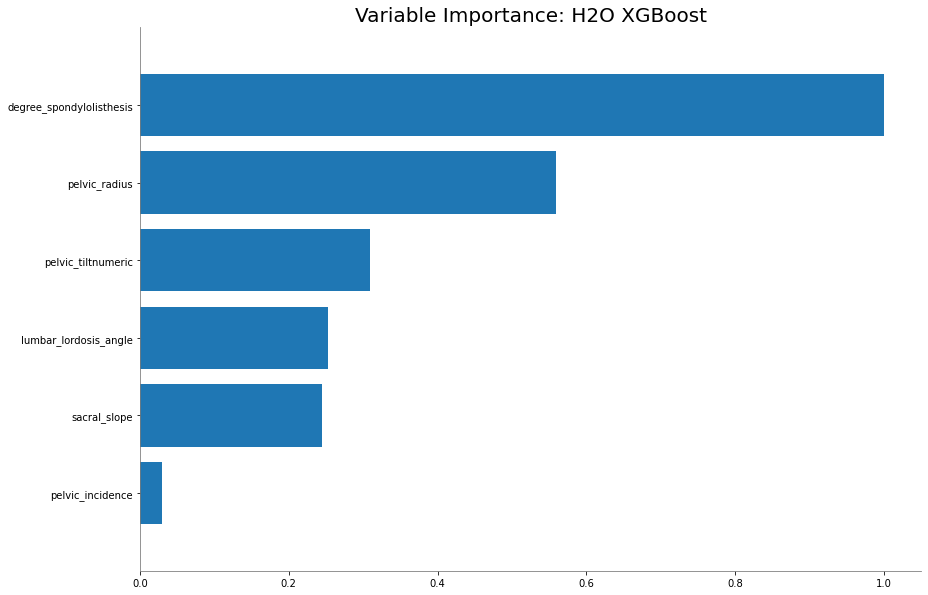

In [41]:
final.varimp_plot()    #Importance of feature plot

Download the final model in mojo

In [42]:
aml.leader.download_mojo(path = "./")

'/content/GLM_1_AutoML_20200803_113330.zip'